In [ ]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras

# **1. 이미지 file 가져오기**

In [ ]:
# 이미지 처리에 필요한 모듈 준비하기
import os
import glob

In [ ]:
path = '/content/drive/MyDrive/AI 감정인식 프로젝트/datasets_renamed' 
# 상위 폴더 경로(datasets)
# 본인 구글 드라이브 주소에 맞게 경로 변경하셔야 합니다.
                                                              
# 각 잠정에 해당하는 path 잡아주기
path_angry = path+ '/angry'
path_disgust = path + '/disgust'
path_fear = path+ '/fear'
path_happy = path+ '/happy'
path_neutral = path+ '/neutral'
path_sad = path+ '/sad'
path_surprise = path+ '/surprise'

# 각각의 감정별로 폴더에 접근하여 모든 파일 가져오기 -> 해당 감정 리스트에 파일 경로를 저장해둔다.
angry = glob.glob(path_angry+ '/*')
disgust = glob.glob(path_disgust+ '/*')
fear = glob.glob(path_fear+ '/*')
happy = glob.glob(path_happy+ '/*')
neutral = glob.glob(path_neutral+ '/*')
sad = glob.glob(path_sad+ '/*')
surprise = glob.glob(path_surprise+ '/*')

print(angry[0])

/content/drive/MyDrive/AI 감정인식 프로젝트/datasets_renamed/angry/angry_015.jpg


# **2. 이미지 renaming**


In [ ]:
# 파일의 이름을 재정의 해주는 함수 정의
def rename(files):
    if 'angry' in files[0]: # 파일 경로에 angry라는 단어가 포함되어 있으면
        for i,f in enumerate(files): # i: 순번, f: 파일
            os.rename(f, os.path.join(path+"/angry", 'angry_' + '{0:03d}.jpg'.format(i)))
        angry = glob.glob(path+"/angry" + '/*')    
        print("angry {}번째 이미지까지 성공".format(i+1))
    
    elif 'disgust' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"/disgust", 'disgust_' + '{0:03d}.jpg'.format(i)))
        disgust = glob.glob(path+"/disgust"+'/*')
        print("disgust {}번째 이미지까지 성공".format(i+1))
    
    elif 'fear' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"/fear", 'fear_' + '{0:03d}.jpg'.format(i)))
        fear = glob.glob(path+"/fear"+'/*')
        print("fear {}번째 이미지까지 성공".format(i+1))
    
    elif 'happy' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"/happy", 'happy_' + '{0:03d}.jpg'.format(i)))
        happy = glob.glob(path+"/happy"+'/*')
        print("happy {}번째 이미지까지 성공".format(i+1))
    
    elif 'neutral' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"/neutral", 'neutral_' + '{0:03d}.jpg'.format(i)))
        neutral = glob.glob(path+"/neutral"+'/*')
        print("neutral {}번째 이미지까지 성공".format(i+1))
    
    elif 'sad' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"/sad", 'sad_' + '{0:03d}.jpg'.format(i)))
        sad = glob.glob(path+"/sad"+'/*')
        print("sad {}번째 이미지까지 성공".format(i+1))
    
    elif 'surprise' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"/surprise", 'surprise_' + '{0:03d}.jpg'.format(i)))
        surprise = glob.glob(path+"/surprise"+'/*')
        print("surprise {}번째 이미지까지 성공".format(i+1))

In [ ]:
# 이름 재정의 전 처음 한 번만 돌려야 합니다.(이후에는 파일이 변형될 위험이 있음.)

rename(angry)
rename(disgust)
rename(fear)
rename(happy)
rename(neutral)
rename(sad)
rename(surprise)

In [ ]:
# 이미지 리스트 정렬(0번부터)
angry = sorted(glob.glob(path+"/angry" + '/*'))
disgust = sorted(glob.glob(path+"/disgust"+'/*'))
fear = sorted(glob.glob(path+"/fear"+'/*'))
happy = sorted(glob.glob(path+"/happy"+'/*'))
neutral = sorted(glob.glob(path+"/neutral"+'/*'))
sad = sorted(glob.glob(path+"/sad"+'/*'))
surprise = sorted(glob.glob(path+"/surprise"+'/*'))

In [ ]:
# 각 감정에 해당하는 이미지의 개수 확인하기
# 나중에 데이터 처리할 때는 이 부분은 주석처리 해주기

print('angry 이미지 개수: {}'.format(len(angry)))
print('disgust 이미지 개수: {}'.format(len(disgust)))
print('fear 이미지 개수: {}'.format(len(fear)))
print('happy 이미지 개수: {}'.format(len(happy)))
print('neutral 이미지 개수: {}'.format(len(neutral)))
print('sad 이미지 개수: {}'.format(len(sad)))
print('surprise 이미지 개수: {}'.format(len(surprise)))

angry 이미지 개수: 1015
disgust 이미지 개수: 1085
fear 이미지 개수: 1000
happy 이미지 개수: 1614
neutral 이미지 개수: 1432
sad 이미지 개수: 1383
surprise 이미지 개수: 1666


# **3. 감정 labeling**
- 각각의 감정에 대해 알려줄 수 있는 방법이 요구된다.

In [ ]:
feeling_images = [] #감정이 labeling 된 data 전체가 담길 빈 리스트

def put_label(feeling,emotion):
  
  for i in range(len(feeling)):
    filename = str(feeling[i]).split('/')[-1] # /로 구분 -> 제일 마지막 부분(파일 이름만 가져오기)
    filename = filename.replace('.jpg','') # filename에서 '.jpg'(확장자) 날려주기 -> 파일의 순수한 이름

    feeling_images.append([filename,str(emotion)])  # 매개변수로 넘어오는 감정을 label로 같이 저장

In [ ]:
put_label(angry,'angry')
put_label(disgust,'disgust')
put_label(fear,'fear')
put_label(happy,'happy')
put_label(neutral,'neutral')
put_label(sad,'sad')
put_label(surprise,'surprise')

In [ ]:
# Dataframe으로 만들기
colnames = ['file_name','emotion']  

feelings_df= pd.DataFrame(feeling_images,columns = colnames)
feelings_df

,file_name,emotion
0,angry_000,angry
1,angry_001,angry
2,angry_002,angry
3,angry_003,angry
4,angry_004,angry
...,...,...
21454,surprise_995,surprise
21455,surprise_996,surprise
21456,surprise_997,surprise
21457,surprise_998,surprise


# **4. 교차 검증**
- 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것
- 대부분의 ML 모델의 성능을 평가할 때는 교차 검증 결과를 기반으로 1차적 평가를 한 후, 최종적으로 테스트 데이터 세트에 적용해 평가를 하는 방식이다.

### **4-1. Stratified K Fold**
- 불균형한(imbalanced) 분포도를 가진 label 데이터 집합을 위한 KFold 방식
- Stratified K Fold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 train/test data set를 분배해준다.
- 학습 데이터와 검증 데이터 세트가 가지는 레이블의 분포도가 유사하도록 test data를 추출한다.

In [ ]:
# 교차검증을 위한 모듈
from sklearn.model_selection import StratifiedKFold 

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42) 

feelings_df['fold'] = -1 # 초기값으로 fold에 아무런 영향이 없는 값 설정

for idx, (t,v) in enumerate(skf.split(feelings_df,feelings_df['emotion']),1):  # 1의 의미: fold값을 1번부터 시작하겠다.
    print(t,v,len(v))
    feelings_df.loc[v,'fold'] = idx

[    0     3     4 ... 21454 21457 21458] [    1     2     8 ... 21453 21455 21456] 4292
[    0     1     2 ... 21456 21457 21458] [   13    16    18 ... 21451 21452 21454] 4292
[    0     1     2 ... 21456 21457 21458] [   20    23    30 ... 21427 21437 21444] 4292
[    1     2     3 ... 21455 21456 21457] [    0     4     5 ... 21448 21450 21458] 4292
[    0     1     2 ... 21455 21456 21458] [    3    14    22 ... 21435 21441 21457] 4291


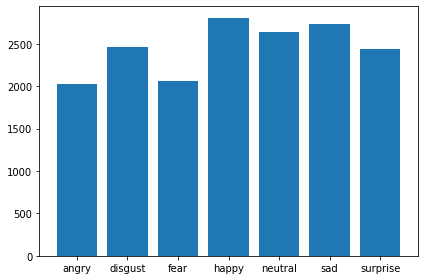

In [ ]:
# 시각화를 통해 train dataset과 test dataset이 분배된 양상 파악하기
value_counts = feelings_df[feelings_df['fold'] != 5]['emotion'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align = "center")
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [ ]:
# 정리된 dataframe을 csv 파일로 내보내기
# 앞에 붙여진 index를 날리고 저장

feelings_df.to_csv('경로',index = False) 